# Examinie silicon
Check the silicon data.

First check the energy relation between the two layers of silicon detectors.

In [52]:
from spyral.core.silicon_point import SiliconPoint
from spyral.core.run_stacks import form_run_string

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pathlib import Path
import h5py as h5
import itertools

%matplotlib widget

def create_hist2d_formatter(h, xedges, yedges):
    # create function for coordinate formatter
    def formatter(x, y):
        # 查找索引
        col = np.searchsorted(xedges, x) - 1
        row = np.searchsorted(yedges, y) - 1
        if 0 <= col < h.shape[0] and 0 <= row < h.shape[1]:
            z = h[col, row]
            return f'x={x:.2f}, y={y:.2f}, [Z={int(z)}]'
        return f'x={x:.2f}, y={y:.2f}'
    return formatter

# Some parameters
workspace_path = Path("/data/pwl/spyraline/")
pointcloud_path = workspace_path / "Pointcloud" # this may change if you add custom phases!

min_run = 1025
max_run = 1045

## Analysis
First, check the energy.

In [24]:
energy = [[], [], [], []]
for run in range(min_run, max_run+1):
    point_file_path = pointcloud_path / f"run_{run:04d}.h5"
    point_file = h5.File(point_file_path, 'r')
    cloud_group: h5.Group = point_file.get('cloud')
    min_event = cloud_group.attrs['min_event']
    max_event = cloud_group.attrs['max_event']
    for idx in range(min_event, max_event+1):
        event_name = f"silicon_{idx}"
        if event_name not in cloud_group:
            continue
        silicon_data = cloud_group[event_name]
        for row in silicon_data:
            energy[int(row[0]*2+row[1])].append(row[3])

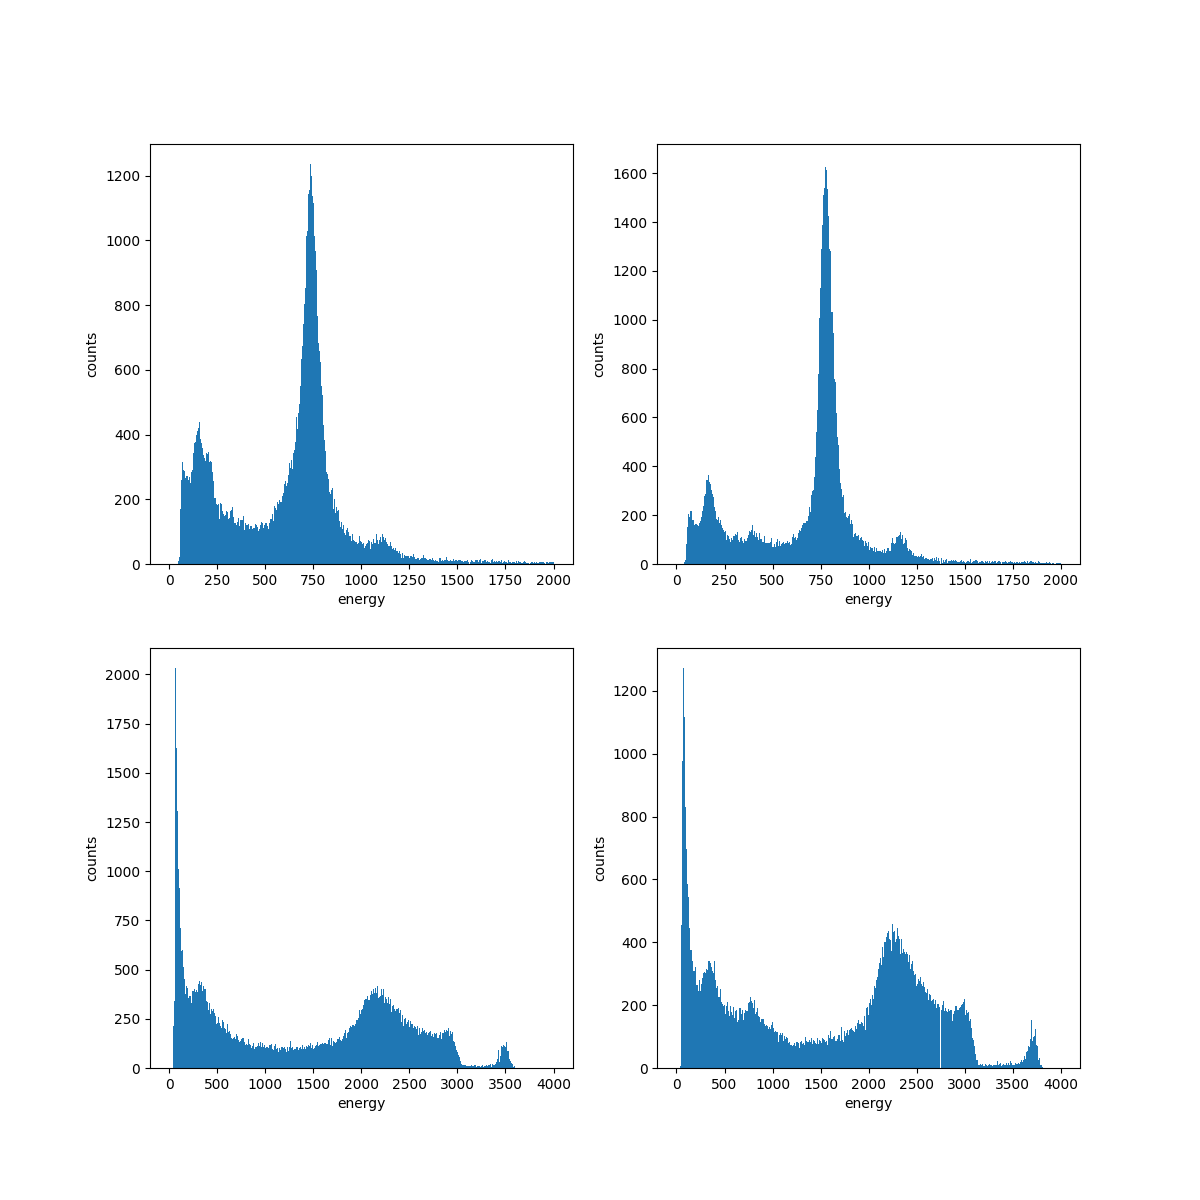

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12.0, 12.0))
hist_range = [2000, 2000, 4000, 4000]
for idx, ax in enumerate(axes.flatten()):
    ax.hist(energy[idx], bins=1000, range=[0, hist_range[idx]])
    ax.set_xlabel("energy")
    ax.set_ylabel("counts")
plt.show()

In [26]:
correlated_strip_pairs = [[], []]
neighbor_strip_pairs = [[], [], [], []]
energy_pair = [[], []]
for run in range(min_run, max_run+1):
    point_file_path = pointcloud_path / f"run_{run:04d}.h5"
    point_file = h5.File(point_file_path, 'r')
    cloud_group: h5.Group = point_file.get('cloud')
    min_event = cloud_group.attrs['min_event']
    max_event = cloud_group.attrs['max_event']
    for idx in range(min_event, max_event+1):
        event_name = f"silicon_{idx}"
        if event_name not in cloud_group:
            continue
        silicon_data = cloud_group[event_name]
        for row1, row2 in itertools.permutations(silicon_data, 2):
            if row1[3] < 150 or row2[3] < 150:
                continue
            if row1[0] == 0 and row1[1] == 1 and row2[0] == 1 and row2[1] == 1:
                energy_pair[0].append(row1[3])
                energy_pair[1].append(row2[3])
            if row1[0] == row2[0] and row1[1] == 0 and row2[1] == 1:
                correlated_strip_pairs[int(row1[0])].append((int(row1[2]), int(row2[2])))
            if row1[0] == row2[0] and row1[1] == row2[1]:
                if row1[2] >= row2[2]:
                    continue
                neighbor_strip_pairs[int(row1[0]*2+row1[1])].append((int(row1[2]), int(row2[2])))


correlated_strips = [np.array(correlated_strip_pairs[0]), np.array(correlated_strip_pairs[1])]
neighbor_strip = [
    np.array(neighbor_strip_pairs[0]),
    np.array(neighbor_strip_pairs[1]),
    np.array(neighbor_strip_pairs[2]),
    np.array(neighbor_strip_pairs[3]),
]
print(correlated_strips[0].shape, correlated_strips[1].shape)
print(neighbor_strip[0].shape, neighbor_strip[1].shape, neighbor_strip[2].shape, neighbor_strip[3].shape)

(159043, 2) (212677, 2)
(19827, 2) (16534, 2) (44561, 2) (40487, 2)


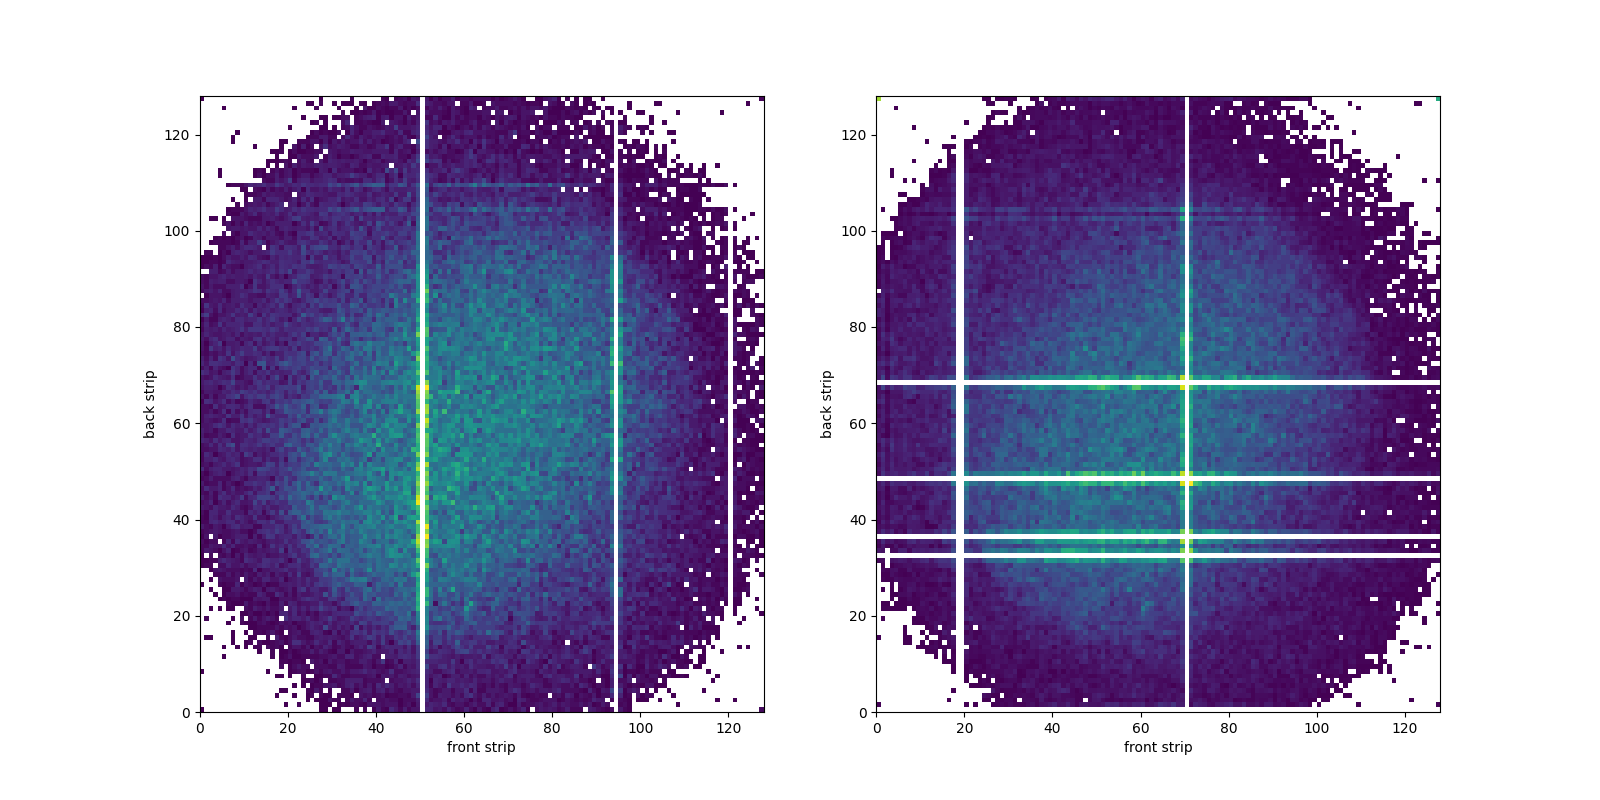

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16.0, 8.0))
for idx, ax in enumerate(axes):
    ax.hist2d(
        correlated_strips[idx][:, 0],
        correlated_strips[idx][:, 1],
        bins=[128, 128],
        range=[[0, 128], [0, 128]],
        cmin=1
    )
    ax.set_xlabel("front strip")
    ax.set_ylabel("back strip")
plt.show()

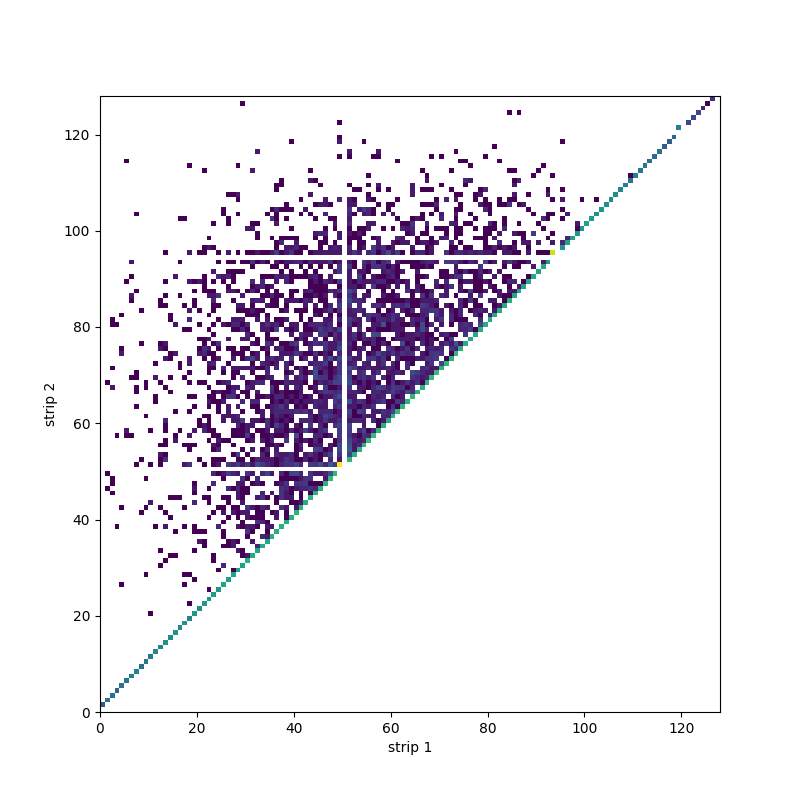

In [56]:
idx = 0
fig, ax = plt.subplots(1, 1, figsize=(8.0, 8.0))
h, xedges, yedges, image = ax.hist2d(
	neighbor_strip[idx][:, 0], neighbor_strip[idx][:, 1],
	bins=[128, 128], range=[[0, 128], [0, 128]], cmin=2, cmax=5000, norm=colors.LogNorm()
)
ax.set_xlabel("strip 1")
ax.set_ylabel("strip 2")
ax.format_coord=create_hist2d_formatter(h, xedges, yedges)
plt.show()

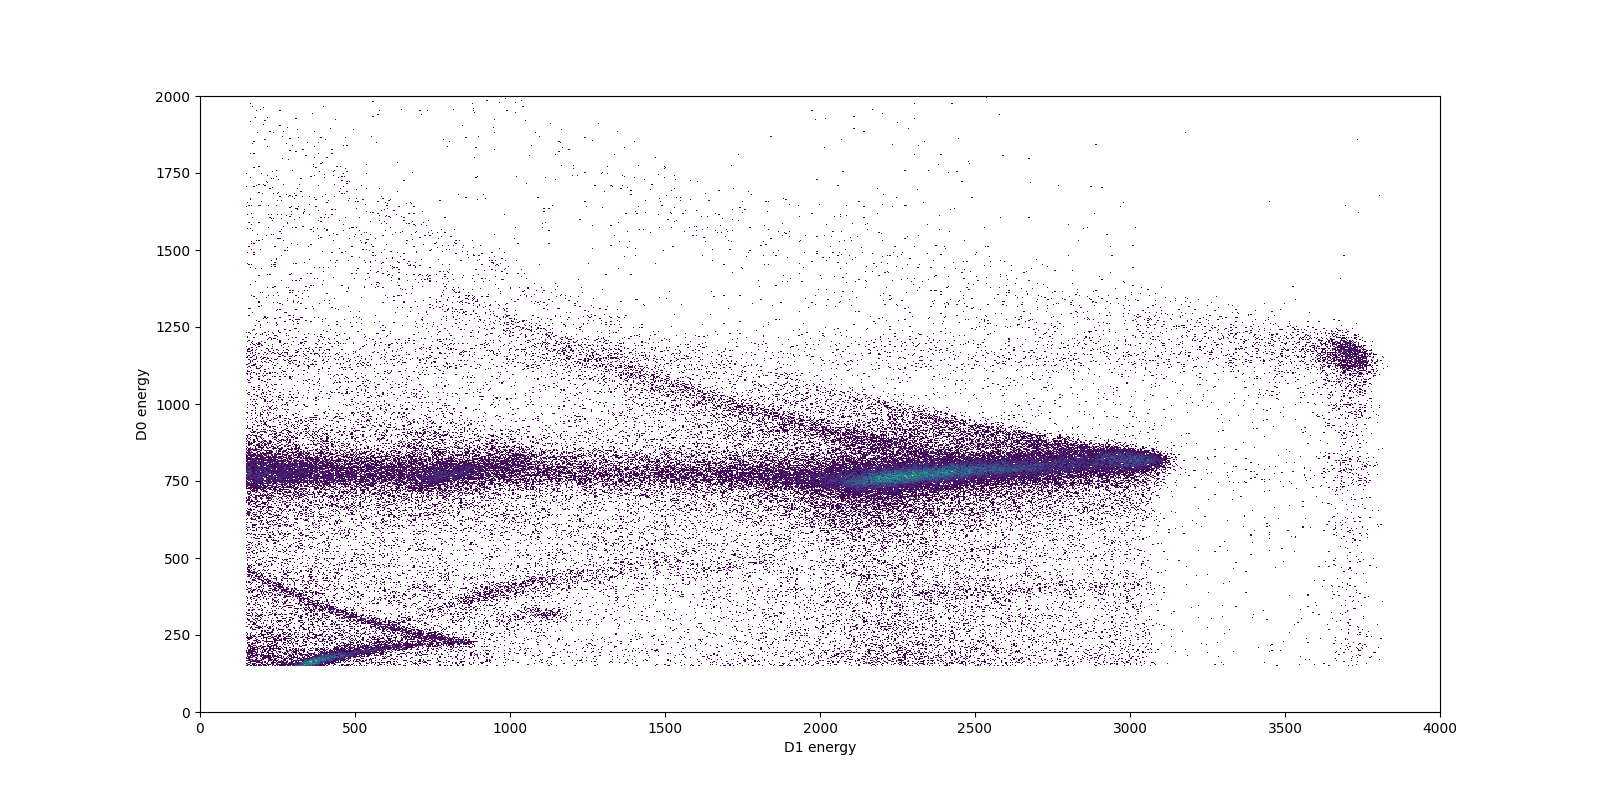

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16.0, 8.0))
ax.hist2d(energy_pair[1], energy_pair[0], bins=[1000, 1000], range=[[0, 4000], [0, 2000]], cmin=1)
ax.set_xlabel("D1 energy")
ax.set_ylabel("D0 energy")
plt.show()

In [57]:
neighbor_energy_0_48_49 = [[], []]
neighbor_energy_0_49_51 = [[], []]
neighbor_energy_0_51_52 = [[], []]
neighbor_energy_0_93_95 = [[], []]
neighbor_energy_0_119_121 = [[], []]
neighbor_energy_1 = [[], []]
for run in range(min_run, max_run+1):
    point_file_path = pointcloud_path / f"run_{run:04d}.h5"
    point_file = h5.File(point_file_path, 'r')
    cloud_group: h5.Group = point_file.get('cloud')
    min_event = cloud_group.attrs['min_event']
    max_event = cloud_group.attrs['max_event']
    for idx in range(min_event, max_event+1):
        event_name = f"silicon_{idx}"
        if event_name not in cloud_group:
            continue
        silicon_data = cloud_group[event_name]
        for row1, row2 in itertools.permutations(silicon_data, 2):
            if row1[3] < 150 or row2[3] < 150:
                continue
            if row1[0] == row2[0] and row1[1] == row2[1]:
                if row1[2] >= row2[2]:
                    continue
                if row1[0] == 0 and row1[1] == 0:
                    if row1[2] == 48 and row2[2] == 49:
                        neighbor_energy_0_48_49[0].append(row1[3])
                        neighbor_energy_0_48_49[1].append(row2[3])
                    elif row1[2] == 49 and row2[2] == 51:
                        neighbor_energy_0_49_51[0].append(row1[3])
                        neighbor_energy_0_49_51[1].append(row2[3])
                    elif row1[2] == 51 and row2[2] == 52:
                        neighbor_energy_0_51_52[0].append(row1[3])
                        neighbor_energy_0_51_52[1].append(row2[3])
                    elif row1[2] == 93 and row2[2] == 95:
                        neighbor_energy_0_93_95[0].append(row1[3])
                        neighbor_energy_0_93_95[1].append(row2[3])
                    elif row1[2] == 119 and row2[2] == 121:
                        neighbor_energy_0_119_121[0].append(row1[3])
                        neighbor_energy_0_119_121[1].append(row2[3])
                if row1[0] == 0 and row1[1] == 1 and row1[2] == 104 and row2[2] == 109:
                    neighbor_energy_1[0].append(row1[3])
                    neighbor_energy_1[1].append(row2[3])

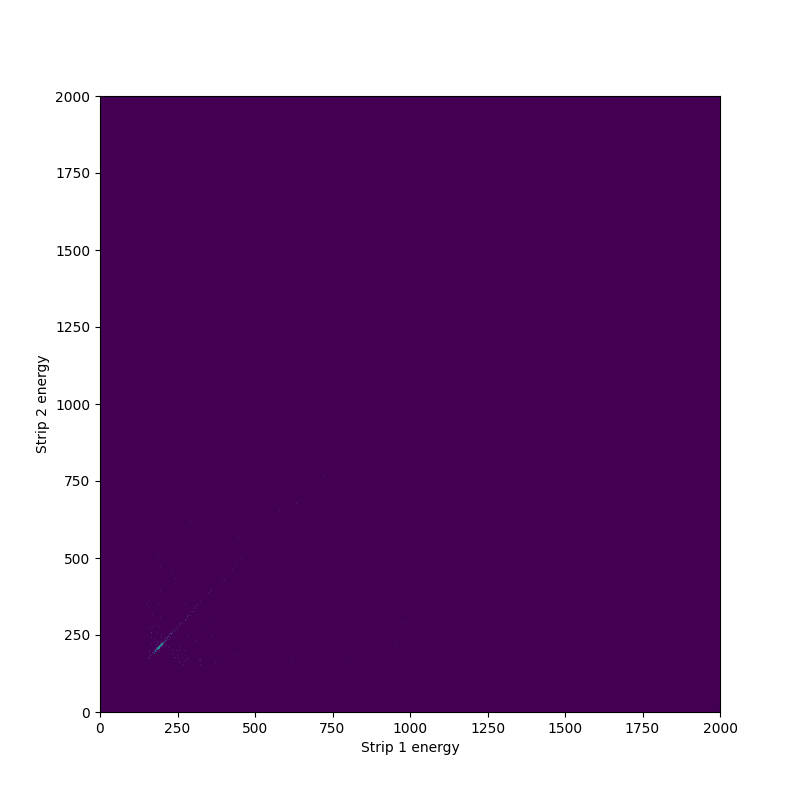

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8.0, 8.0))
ax.hist2d(neighbor_energy_0_93_95[1], neighbor_energy_0_93_95[0], bins=[1000, 1000], range=[[0, 2000], [0, 2000]])
ax.set_xlabel("Strip 1 energy")
ax.set_ylabel("Strip 2 energy")
plt.show()

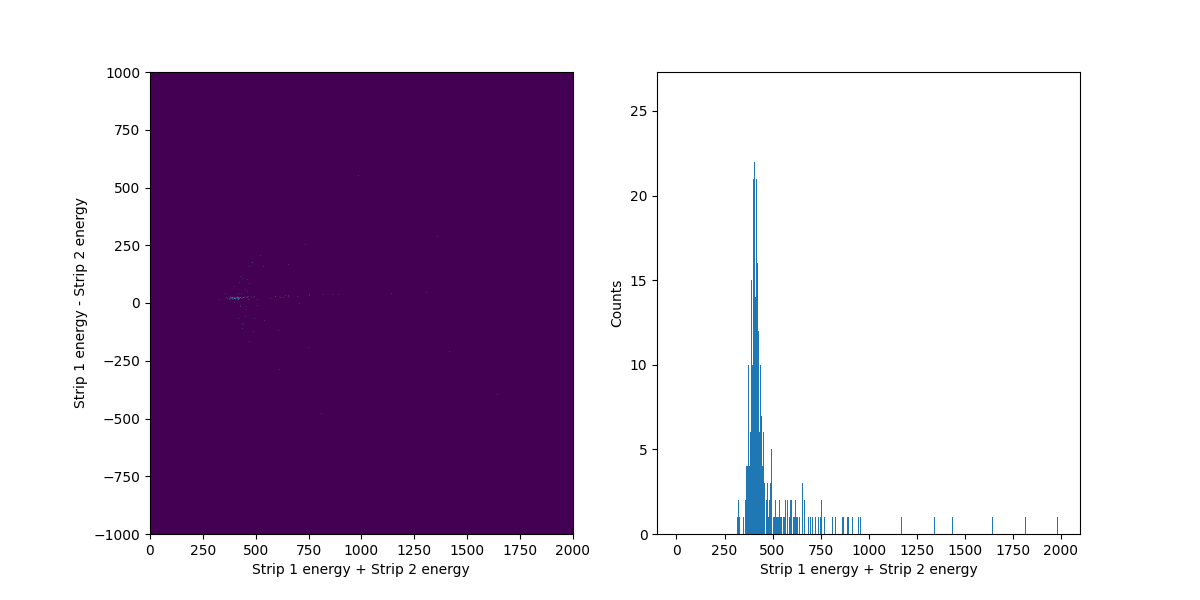

In [72]:
sum = []
diff = []
for idx, e in enumerate(neighbor_energy_0_93_95[0]):
	sum.append(e + neighbor_energy_0_93_95[1][idx])
	diff.append(e - neighbor_energy_0_93_95[1][idx])
fig, axes = plt.subplots(1, 2, figsize=(12.0, 6.0))
axes[0].hist2d(sum, diff, bins=[1000, 1000], range=[[0, 2000], [-1000, 1000]])
axes[0].set_xlabel("Strip 1 energy + Strip 2 energy")
axes[0].set_ylabel("Strip 1 energy - Strip 2 energy")
axes[1].hist(sum, bins=1000, range=[0, 2000])
axes[1].set_xlabel("Strip 1 energy + Strip 2 energy")
axes[1].set_ylabel("Counts")
plt.show()